In [1]:
from data_io.DataLoader import DataLoader
from models.Visualization import *

import models.Model
reload(models.Model)
from models.Model import Model

import numpy as np
import cv2

## Load Training Data

In [2]:
dl = DataLoader("/Users/iankurgarg/Code/Vision/Project-1/image-classification/images-2/", rgb=0)

face, non_face = dl.load_data(train=1)

## Visualize Mean and Covariance Matrix

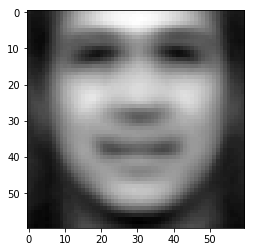

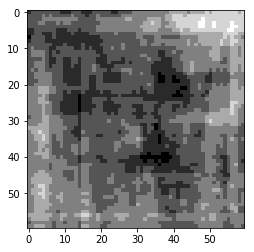

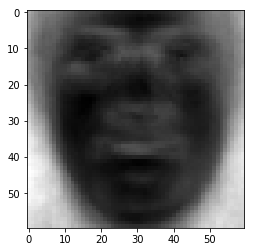

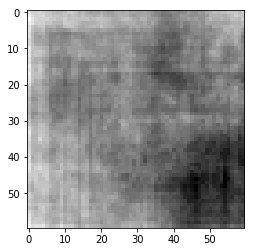

In [3]:
show_mean(face, dim3=1)
show_mean(non_face, dim3=1)
show_cov(face, dim3=1)
show_cov(non_face, dim3=1)

## Fit Model 1 - Single Gaussian Model

In [22]:
# mtype = 'factor' or 'g' or 'mog' or 't-dist'
m = Model(mtype='t-dist')
m.fit(face, non_face)

self.v =  100.0
Finished EM. Last Iteration Number =  1  max iter =  400
self.v =  100.0
Finished EM. Last Iteration Number =  1  max iter =  400


## Load Testing Data

In [23]:
test_face, test_non_face = dl.load_data(train=0)
testX = np.concatenate((test_face, test_non_face))
testY = [1]*len(test_face) + [0]*len(test_non_face)

## Predict Labels for Test Data

In [24]:
len(testY)

2000

In [25]:
predicted = m.predict(testX)

print "false_positive_rate = ", m.false_positive_rate(testY, predicted)
print "false_negative_rate = ", m.false_negative_rate(testY, predicted)
print "misclassification_rate = ", m.misclassification_rate(testY, predicted)

false_positive_rate =  0.208764940239
false_negative_rate =  0.00939597315436
misclassification_rate =  0.1345


## Threshold Variation for ROC

In [26]:
fpr = [1.0]
tpr = [1.0]
for thresh in np.arange(0.01, 0.99, 0.03):
    m.thresh = thresh
    predicted = m.predict(testX)

    fp = m.false_positive_rate(testY, predicted)
    fn = m.false_negative_rate(testY, predicted)
    fpr.append(fp)
    tpr.append(1-fn)

fpr.append(0.0)
tpr.append(0.0)

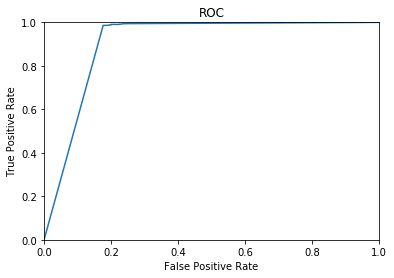

In [27]:
ROV(fpr, tpr)